
## <p style="text-align: center;">**Airline On Time Performance**</p>
### <p style="text-align: center;">**Matt Keeran**<br><br>9/24/19</p>


***
## **Table of Contents** <a id="toc"></a>
### 0. <a href="#schema">Schema</a>
### 1. <a href="#eda">Exploratory Data Analysis</a>
***

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
!ls

 Airline_On_Time_Performance    README.md
 Bike-Sharing-Dataset	        SF_Resturant_Scores
'GTRI Airline Arrivals.ipynb'


In [5]:
!ls Airline_On_Time_Performance/

Airline_On_Time_Performance.csv  Airline_On_Time_Performance_ReadMe.csv


In [3]:
%time data = pd.read_csv('Airline_On_Time_Performance/Airline_On_Time_Performance.csv')
data.info()

CPU times: user 4.85 s, sys: 351 ms, total: 5.2 s
Wall time: 4.99 s
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638649 entries, 0 to 638648
Data columns (total 50 columns):
YEAR                      638649 non-null int64
MONTH                     638649 non-null int64
DAY_OF_MONTH              638649 non-null int64
DAY_OF_WEEK               638649 non-null int64
FL_DATE                   638649 non-null object
MKT_UNIQUE_CARRIER        638649 non-null object
MKT_CARRIER_AIRLINE_ID    638649 non-null int64
MKT_CARRIER_FL_NUM        638649 non-null int64
OP_UNIQUE_CARRIER         638649 non-null object
TAIL_NUM                  633964 non-null object
OP_CARRIER_FL_NUM         638649 non-null int64
ORIGIN_AIRPORT_ID         638649 non-null int64
ORIGIN_AIRPORT_SEQ_ID     638649 non-null int64
ORIGIN_CITY_MARKET_ID     638649 non-null int64
ORIGIN                    638649 non-null object
ORIGIN_CITY_NAME          638649 non-null object
ORIGIN_STATE_ABR          638649 non-null objec

In [4]:
data.drop('Unnamed: 49', axis=1, inplace=True)

In [5]:
schema = pd.read_csv('Airline_On_Time_Performance/Airline_On_Time_Performance_ReadMe.csv')
schema.head()

,SYS_FIELD_NAME,FIELD_DESC,Unnamed: 2
0,YEAR,Year,NaN
1,MONTH,Month,NaN
2,DAY_OF_MONTH,Day of Month,NaN
3,DAY_OF_WEEK,Day of Week,NaN
4,FL_DATE,Flight Date (yyyymmdd),NaN


In [86]:
list(schema.columns)

['SYS_FIELD_NAME', ' FIELD_DESC', 'Unnamed: 2']

In [6]:
schema.drop('Unnamed: 2', axis=1, inplace=True)
schema.columns = ['Field', 'Description']
schema.head()

,Field,Description
0,YEAR,Year
1,MONTH,Month
2,DAY_OF_MONTH,Day of Month
3,DAY_OF_WEEK,Day of Week
4,FL_DATE,Flight Date (yyyymmdd)


In [10]:
def scheme():
    f = open('schema.txt', 'w')
    f.write("SCHEMA:\n-----------------------------------------------------------------------------------------------------------------------------------------------------\n")
    print("SCHEMA:\n------------------------------------------------------------------------------------------------------------------------------------------------------------")
    for index, row in schema.iterrows():
        f.write('{}:\t{}\t\t{:,} NON NULL VALUES\t\t{:,} TOTAL VALUES\t{:.2f} % NULL\n'.format(
            row['Field'], 
            str(type(data[row['Field']].iloc[0])), 
            (len(data[row['Field']]) - data[row['Field']].isnull().sum()),
            len(data[row['Field']]),
            ((data[row['Field']].isnull().sum()/len(data[row['Field']])))*100)
       )
        print('{}:\t{}\t\t{:,} NON NULL VALUES\t\t{:,} TOTAL VALUES\t{:.2f} % NULL'.format(
            row['Field'], 
            str(type(data[row['Field']].iloc[0])), 
            (len(data[row['Field']]) - data[row['Field']].isnull().sum()),
            len(data[row['Field']]),
            ((data[row['Field']].isnull().sum()/len(data[row['Field']])))*100)
        )
        f.write(row['Description'] + '\n\n')
        print(row['Description'] + '\n')
        try:
            f.write('{}\t{}'.format(data[row['Field']].min(), data[row['Field']].max()))
            print('{}\t{}'.format(data[row['Field']].min(), data[row['Field']].max()))
        except Exception:
            f.write('{}'.format(list(data[row['Field']].value_counts().head(2).index)))
            print('{}'.format(list(data[row['Field']].value_counts().head(2).index)))
            
        f.write('\n------------------------------------------------------------------------------------------------------------------------------------------------------\n')
        print('\n---------------------------------------------------------------------------------------------------------------------------------------------------------------')
    f.close()

***
### **0. Schema** <a id="schema"></a>
##### <a href="#toc">Table of Contents</a>
***

In [11]:
scheme()

SCHEMA:
------------------------------------------------------------------------------------------------------------------------------------------------------------
YEAR:	<class 'numpy.int64'>		638,649 NON NULL VALUES		638,649 TOTAL VALUES	0.00 % NULL
Year

2019	2019

---------------------------------------------------------------------------------------------------------------------------------------------------------------
MONTH:	<class 'numpy.int64'>		638,649 NON NULL VALUES		638,649 TOTAL VALUES	0.00 % NULL
Month

1	1

---------------------------------------------------------------------------------------------------------------------------------------------------------------
DAY_OF_MONTH:	<class 'numpy.int64'>		638,649 NON NULL VALUES		638,649 TOTAL VALUES	0.00 % NULL
Day of Month

1	31

---------------------------------------------------------------------------------------------------------------------------------------------------------------
DAY_OF_WEEK:	<class 'numpy.int64'>		

***
### **1. Exploratory Data Analysis** <a id="eda"></a>
##### <a href="#schema">Schema</a>
##### <a href="#toc">Main Table of Contents</a>
###### 1. <a href="#date">Date</a>
###### 2. <a href="#mktcarrier">Unique Marketing Carrier Code</a>
###### 3. <a href="#mktcarrierid">Unique Marketing Carrier Id</a>
###### 4. <a href="#mktfl">Marketing Flight Number</a>
###### 5. <a href="#uqcarrier">Unique Carrier Code</a>
###### 6. <a href="#tail">Tail Number</a>
###### 7. <a href="#fl">Flight Number</a>
###### 8. <a href="#originid">Origin Airport ID</a>
###### 9. <a href="#originseq">Origin Sequence ID</a>
###### 10. <a href="#origincitymkt">City Market ID</a>
###### 11. <a href="#origin">Origin Airport</a>
###### 12. <a href="#origincity">Origin City</a>
###### 13. <a href="#originstate">Origin State Code</a>
###### 14. <a href="#destid">Destination ID</a>
###### 15. <a href="#destseq">Destination Sequence ID</a>
###### 16. <a href="#destcitymkt">Destination City Market ID</a>
###### 17. <a href="#dest">Destination Airport</a>
###### 18. <a href="#destcity">Destination City</a>
###### 19. <a href="#deststatecode">Destination State Code</a>
###### 20. <a href="#deststatefips">Destination State Fips</a>
###### 21. <a href="#destworld">Destination World Area Code</a>
###### 22. <a href="#deststate">Destination State</a>
###### 23. <a href="#crsdep">CRS Departure Time</a>
###### 24. <a href="#actualdep">Actual Departure Time</a>
###### 25. <a href="#depdelay">Departure Delay</a>
###### 26. <a href="#depdelaynew">Departure Delay New</a>
###### 27. <a href="#del15">15 min Delay +</a>
###### 28. <a href="#taxiout">Taxi Out Time</a>
###### 29. <a href="#wheelsoff">Wheels Off Time</a>
###### 30. <a href="#wheelson">Wheels On Time</a>
###### 31. <a href="#taxiin">Taxi In Time</a>
###### 32. <a href="#canceled">Cancelled Flight</a>
###### 33. <a href="#canceledreason">Cancellation Reason</a>
###### 34. <a href="#diverted">Diverted</a>
###### 35. <a href="#numfl">Number of Flights</a>
###### 36. <a href="#dist">Distance</a>
###### 37. <a href="#carrierdelay">Carrier Delay</a>
###### 38. <a href="#weatherdelay">Weather Delay</a>
###### 39. <a href="#nasdelay">National Air System Delay</a>
###### 40. <a href="#secdelay">Security Delay</a>
###### 41. <a href="#latedelay">Late Aircraft Delay</a>
###### 42. <a href="#numdiverted">Number of Diverted Airport Landings</a>
###### 43. <a href="#diff">Diff In Minutes</a>
###### 44. <a href="#diffdist">Diff In Distance</a>
###### 45. <a href="#dup">Duplicate Flag</a>
***

In [9]:
data.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,TAIL_NUM,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ARR_DELAY,DIV_DISTANCE,Unnamed: 49
0,2019,1,19,6,2019-01-19,DL,19790,5245,9E,N176PQ,...,596.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2019,1,20,7,2019-01-20,DL,19790,5245,9E,N309PQ,...,596.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2019,1,21,1,2019-01-21,DL,19790,5245,9E,N176PQ,...,596.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2019,1,22,2,2019-01-22,DL,19790,5245,9E,N135EV,...,596.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2019,1,23,3,2019-01-23,DL,19790,5245,9E,N294PQ,...,596.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [10]:
data.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ARR_DELAY,DIV_DISTANCE,Unnamed: 49
count,638649.0,638649.0,638649.000000,638649.000000,638649.000000,638649.000000,638649.000000,638649.000000,6.386490e+05,638649.000000,...,638649.000000,117144.000000,117144.000000,117144.000000,117144.000000,117144.000000,638649.000000,1061.000000,1450.000000,0.0
mean,2019.0,1.0,15.955094,3.836976,19822.089542,2700.769462,2700.871319,12690.345843,1.269038e+06,31776.883607,...,765.250902,20.088609,4.410785,18.384826,0.073422,25.880882,0.004459,305.625825,58.320000,NaN
std,0.0,0.0,8.989170,1.921977,261.399496,1861.613306,1861.933516,1520.775468,1.520773e+05,1316.122179,...,579.910495,65.596080,38.353695,41.352734,3.051185,53.007365,0.147790,281.088367,185.652297,NaN
min,2019.0,1.0,1.000000,1.000000,19393.000000,1.000000,1.000000,10135.000000,1.013505e+06,30070.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,NaN
25%,2019.0,1.0,8.000000,2.000000,19790.000000,1090.000000,1090.000000,11292.000000,1.129202e+06,30721.000000,...,337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,0.000000,NaN
50%,2019.0,1.0,16.000000,4.000000,19805.000000,2260.000000,2260.000000,12889.000000,1.288903e+06,31453.000000,...,604.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,189.000000,0.000000,NaN
75%,2019.0,1.0,24.000000,5.000000,19977.000000,4184.000000,4183.000000,14057.000000,1.405702e+06,32575.000000,...,1008.000000,16.000000,0.000000,21.000000,0.000000,30.000000,0.000000,332.000000,30.000000,NaN
max,2019.0,1.0,31.000000,7.000000,20436.000000,9401.000000,9401.000000,16218.000000,1.621802e+06,36101.000000,...,4983.000000,1638.000000,1416.000000,1447.000000,816.000000,1514.000000,9.000000,1557.000000,2586.000000,NaN


# FOR EACH VAR PLOT OVER DATE & DAY OF WEEK

---
### **Date** <a id="date"></a>
##### <a href="#eda">EDA</a>
---

In [24]:
data['FL_DATE'].min()

'2019-01-01'

In [25]:
data['FL_DATE'].max()

'2019-01-31'

In [145]:
data['FL_DATE'].value_counts()

2019-01-02    22311
2019-01-11    21934
2019-01-25    21889
2019-01-18    21858
2019-01-07    21851
2019-01-10    21823
2019-01-31    21802
2019-01-24    21801
2019-01-17    21800
2019-01-14    21781
2019-01-28    21772
2019-01-04    21439
2019-01-03    21384
2019-01-21    21312
2019-01-06    21284
2019-01-09    21020
2019-01-30    20889
2019-01-23    20886
2019-01-16    20881
2019-01-08    20566
2019-01-29    20411
2019-01-22    20407
2019-01-15    20402
2019-01-27    20306
2019-01-13    20300
2019-01-01    19683
2019-01-05    18533
2019-01-20    18454
2019-01-12    16773
2019-01-26    16727
2019-01-19    16370
Name: FL_DATE, dtype: int64

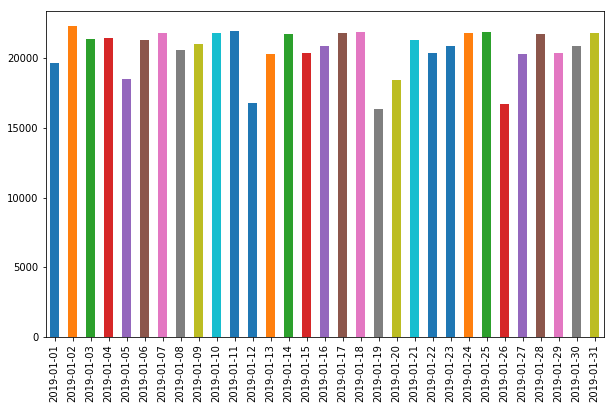

In [152]:
data['FL_DATE'].value_counts().sort_index().plot.bar(figsize=(10,6))

### So this is a dataset from January of this year. Also there are obvious cyclical patterns.

In [80]:
data['DAY_OF_WEEK'].value_counts()

4    108610
3    105987
2    101469
5     87120
1     86716
7     80344
6     68403
Name: DAY_OF_WEEK, dtype: int64

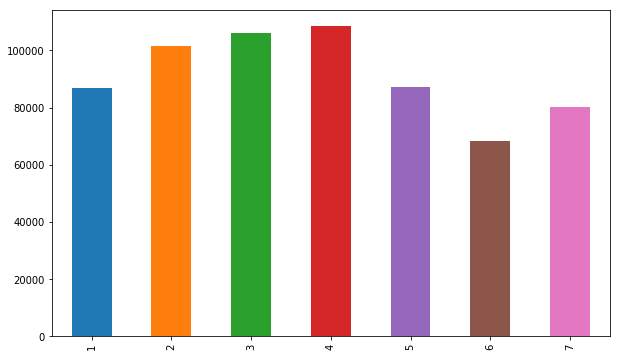

In [153]:
data['DAY_OF_WEEK'].value_counts().sort_index().plot.bar(figsize=(10,6))

---
### **Unique Marketing Carrier Code** <a id="mktcarrier"></a>
##### <a href="#eda">EDA</a>
---

In [163]:
len(data['MKT_UNIQUE_CARRIER'].value_counts())

10

In [138]:
data['MKT_UNIQUE_CARRIER'].value_counts()

AA    168763
DL    135756
UA    123804
WN    111312
AS     35399
B6     24443
NK     15222
F9      9647
HA      7540
G4      6763
Name: MKT_UNIQUE_CARRIER, dtype: int64

In [160]:
data['MKT_UNIQUE_CARRIER'].value_counts()[0]/len(data)*100

26.42500027401593

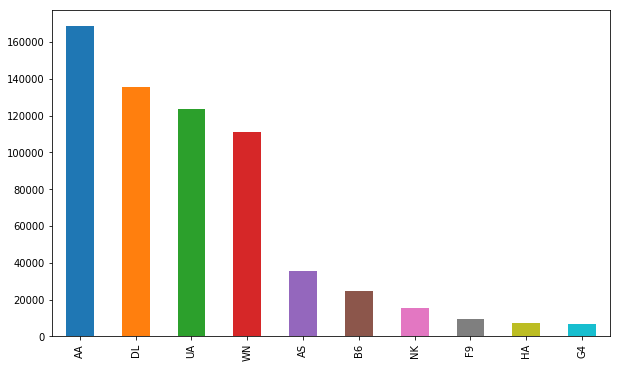

In [151]:
data['MKT_UNIQUE_CARRIER'].value_counts().plot.bar(figsize=(10,6))

---
### **Airline ID**

In [164]:
len(data['MKT_CARRIER_AIRLINE_ID'].value_counts())

10

In [139]:
data['MKT_CARRIER_AIRLINE_ID'].value_counts()

19805    168763
19790    135756
19977    123804
19393    111312
19930     35399
20409     24443
20416     15222
20436      9647
19690      7540
20368      6763
Name: MKT_CARRIER_AIRLINE_ID, dtype: int64

#### So MKT_UNIQUE_CARRIER and MKT_CARRIER_AIRLINE_ID are alternate encodings for airline brand

---
### **Marketing Flight Number**

In [141]:
len(data['MKT_CARRIER_FL_NUM'].value_counts())

6873

In [142]:
data['MKT_CARRIER_FL_NUM'].value_counts().head()

403     310
2116    294
761     291
2011    288
465     287
Name: MKT_CARRIER_FL_NUM, dtype: int64

#### So Flight 403 has the most observations, what carrier(s) are have records with flight 403?

In [155]:
data[data['MKT_CARRIER_FL_NUM'] == 403]['MKT_UNIQUE_CARRIER'].value_counts()

WN    120
NK     62
AA     52
UA     31
B6     31
F9     14
Name: MKT_UNIQUE_CARRIER, dtype: int64

#### So Flight 403, and flight numbers in general are not unique to airline.

In [143]:
data['MKT_CARRIER_FL_NUM'].value_counts().tail()

6356    1
6361    1
6360    1
6365    1
6395    1
Name: MKT_CARRIER_FL_NUM, dtype: int64

---
### **Unique Carrier Code**

In [162]:
len(data['OP_UNIQUE_CARRIER'].value_counts())

26

In [161]:
data['OP_UNIQUE_CARRIER'].value_counts()

WN    111312
AA     77017
DL     73836
OO     65115
UA     46915
YX     25773
MQ     25696
B6     24443
OH     23170
AS     20744
9E     20210
YV     18331
NK     15222
EV     13017
QX     10054
F9      9647
PT      9030
ZW      8726
CP      8194
G7      7221
HA      6798
G4      6763
AX      6254
C5      4207
EM       742
KS       212
Name: OP_UNIQUE_CARRIER, dtype: int64

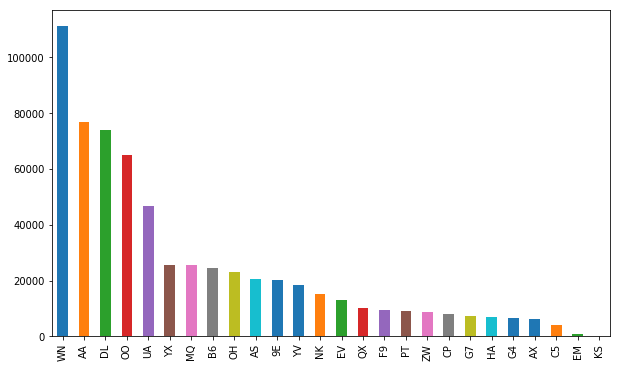

In [4]:
data['OP_UNIQUE_CARRIER'].value_counts().plot.bar(figsize=(10,6))

---
### **Tail Number**

In [165]:
len(data['TAIL_NUM'].value_counts())

5825

In [167]:
data['TAIL_NUM'].value_counts().head()

N488HA    361
N481HA    348
N483HA    346
N489HA    344
N493HA    328
Name: TAIL_NUM, dtype: int64

In [7]:
data[data['TAIL_NUM'] == 'N488HA']['OP_UNIQUE_CARRIER'].value_counts()

HA    361
Name: OP_UNIQUE_CARRIER, dtype: int64

In [8]:
data[data['TAIL_NUM'] == 'N481HA']['OP_UNIQUE_CARRIER'].value_counts()

HA    348
Name: OP_UNIQUE_CARRIER, dtype: int64

In [9]:
data[data['TAIL_NUM'] == 'N483HA']['OP_UNIQUE_CARRIER'].value_counts()

HA    346
Name: OP_UNIQUE_CARRIER, dtype: int64

In [10]:
data[data['TAIL_NUM'] == 'N493HA']['OP_UNIQUE_CARRIER'].value_counts()

HA    328
Name: OP_UNIQUE_CARRIER, dtype: int64

#### So the most common tail numbers all come from HA airline. Also, in general it appears that tail numbers are unique to unique carrier codes.

In [5]:
data['TAIL_NUM'].value_counts().tail()

N665UA    1
N706DN    1
N225AG    1
N2737U    1
N2644U    1
Name: TAIL_NUM, dtype: int64

---
### **Carrier Flight Number**

In [11]:
len(data['OP_CARRIER_FL_NUM'].value_counts())

6880

In [72]:
data['OP_CARRIER_FL_NUM'].value_counts().head()

403     310
2116    294
761     291
2011    288
465     287
Name: OP_CARRIER_FL_NUM, dtype: int64

In [73]:
data[data['OP_CARRIER_FL_NUM'] == 403]['OP_UNIQUE_CARRIER'].value_counts()

WN    120
NK     62
AA     52
B6     31
UA     31
F9     14
Name: OP_UNIQUE_CARRIER, dtype: int64

---
### **Origin Airport**

In [1]:
len(data['ORIGIN_AIRPORT_ID'].calue_counts())

NameError: name 'data' is not defined

In [14]:
cols = list(data.columns)

In [17]:
cols

['YEAR',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'MKT_UNIQUE_CARRIER',
 'MKT_CARRIER_AIRLINE_ID',
 'MKT_CARRIER_FL_NUM',
 'OP_UNIQUE_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'DUP',
 'FLIGHTS',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'DIV_AIRPORT_LANDINGS',
 'DIV_ARR_DELAY',
 'DIV_DISTANCE',
 'Unnamed: 49']